In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/chartevents_ventilation.csv'

# Load the CSV into a DataFrame
ventilation = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(ventilation.head())

   subject_id   stay_id            charttime  itemid                value  \
0    10002428  38875437  2156-04-22 07:00:00  220339                   10   
1    10002428  38875437  2156-04-22 07:00:00  223835                   40   
2    10002428  38875437  2156-04-22 07:00:00  223849  CMV/ASSIST/AutoFlow   
3    10002428  38875437  2156-04-22 07:00:00  224684                  350   
4    10002428  38875437  2156-04-22 07:00:00  224685                  437   

   valuenum  
0      10.0  
1      40.0  
2      49.0  
3     350.0  
4     437.0  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ventilation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657752 entries, 0 to 4657751
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   stay_id     int64  
 2   charttime   object 
 3   itemid      int64  
 4   value       object 
 5   valuenum    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ MB


In [5]:
# Convert charttime to an datetime
ventilation['charttime'] = ventilation['charttime'].astype('datetime64[ns]')
ventilation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657752 entries, 0 to 4657751
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   subject_id  int64         
 1   stay_id     int64         
 2   charttime   datetime64[ns]
 3   itemid      int64         
 4   value       object        
 5   valuenum    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 213.2+ MB


In [6]:
# Count the number of unique subject_ids / patients in this dataframe
print(f'Number of patients: {ventilation["subject_id"].nunique()}')

Number of patients: 5832


In [7]:
# Load the d_items CSV
d_items_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/icu/d_items.csv'
d_items = pd.read_csv(d_items_path)

# Merge the label column into the ventilation dataframe using itemid
ventilation = ventilation.merge(
    d_items[['itemid', 'label']],  # Only keep necessary columns
    on='itemid',
    how='left'  # Keep all rows from ventilation
)

In [8]:
ventilation.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label
0,10002428,38875437,2156-04-22 07:00:00,220339,10,10.0,PEEP set
1,10002428,38875437,2156-04-22 07:00:00,223835,40,40.0,Inspired O2 Fraction
2,10002428,38875437,2156-04-22 07:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
3,10002428,38875437,2156-04-22 07:00:00,224684,350,350.0,Tidal Volume (set)
4,10002428,38875437,2156-04-22 07:00:00,224685,437,437.0,Tidal Volume (observed)


In [9]:
ventilation.shape

(4657752, 7)

In [10]:
# Group by itemid and count nulls in both 'value' and 'valuenum' columns
null_counts = ventilation.groupby('itemid').agg(
    null_value=('value', lambda x: x.isnull().sum()),
    null_valuenum=('valuenum', lambda x: x.isnull().sum())
).reset_index()

In [11]:
null_counts

,itemid,null_value,null_valuenum
0,220210,0,0
1,220339,0,0
2,223835,0,0
3,223836,3368,6705
4,223849,0,9343
5,224369,0,137869
6,224370,0,141860
7,224372,0,156174
8,224373,12844,155865
9,224684,0,0


In [12]:
null_countsventilation = ventilation.dropna(subset=['value', 'valuenum'], how='all')

In [13]:
null_countsventilation

,subject_id,stay_id,charttime,itemid,value,valuenum,label
0,10002428,38875437,2156-04-22 07:00:00,220339,10,10.0,PEEP set
1,10002428,38875437,2156-04-22 07:00:00,223835,40,40.0,Inspired O2 Fraction
2,10002428,38875437,2156-04-22 07:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
3,10002428,38875437,2156-04-22 07:00:00,224684,350,350.0,Tidal Volume (set)
4,10002428,38875437,2156-04-22 07:00:00,224685,437,437.0,Tidal Volume (observed)
...,...,...,...,...,...,...,...
4657747,19998843,30988867,2187-02-08 05:00:00,224686,426,426.0,Tidal Volume (spontaneous)
4657748,19998843,30988867,2187-02-08 05:00:00,224687,9.8,9.8,Minute Volume
4657749,19998843,30988867,2187-02-08 05:00:00,224689,22,22.0,Respiratory Rate (spontaneous)
4657750,19998843,30988867,2187-02-08 05:00:00,224695,11,11.0,Peak Insp. Pressure


In [14]:
# Group by itemid and count nulls in both 'value' and 'valuenum' columns
null_counts = null_countsventilation.groupby('itemid').agg(
    null_value=('value', lambda x: x.isnull().sum()),
    null_valuenum=('valuenum', lambda x: x.isnull().sum())
).reset_index()

In [15]:
null_counts

,itemid,null_value,null_valuenum
0,220210,0,0
1,220339,0,0
2,223835,0,0
3,223836,0,3337
4,223849,0,9343
5,224369,0,137869
6,224370,0,141860
7,224372,0,156174
8,224373,0,143021
9,224684,0,0


In [16]:
null_countsventilation.shape

(4641540, 7)

In [17]:
# Load the d_items CSV
d_items_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/icu/d_items.csv'
d_items = pd.read_csv(d_items_path)

# Merge the label column with null_counts using itemid
null_counts = null_counts.merge(
    d_items[['itemid', 'label']],  
    on='itemid',
    how='left' 
)

In [18]:
null_counts

,itemid,null_value,null_valuenum,label
0,220210,0,0,Respiratory Rate
1,220339,0,0,PEEP set
2,223835,0,0,Inspired O2 Fraction
3,223836,0,3337,Airway Type
4,223849,0,9343,Ventilator Mode
5,224369,0,137869,Sputum Consistency
6,224370,0,141860,Sputum Color
7,224372,0,156174,Sputum Source
8,224373,0,143021,Sputum Amount
9,224684,0,0,Tidal Volume (set)


In [19]:
# Define the itemids to keep
target_itemids = [224369, 224370, 224372, 224373]

# Filter the DataFrame
sputum = null_countsventilation[null_countsventilation['itemid'].isin(target_itemids)]

sputum.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
13,10002428,38875437,2156-04-22 07:00:00,224372,Suctioned,NaN,Sputum Source
62,10002428,38875437,2156-04-22 16:33:00,224369,Tenacious,NaN,Sputum Consistency
63,10002428,38875437,2156-04-22 16:33:00,224370,Yellow,NaN,Sputum Color
64,10002428,38875437,2156-04-22 16:33:00,224372,Suctioned,NaN,Sputum Source
65,10002428,38875437,2156-04-22 16:33:00,224373,Small,NaN,Sputum Amount
330,10002428,38875437,2156-04-22 11:00:00,224372,Suctioned,NaN,Sputum Source
425,10002428,38875437,2156-04-20 20:00:00,224369,Thin,NaN,Sputum Consistency
426,10002428,38875437,2156-04-20 20:00:00,224370,Tan,NaN,Sputum Color
427,10002428,38875437,2156-04-20 20:00:00,224372,Suctioned,NaN,Sputum Source
428,10002428,38875437,2156-04-20 20:00:00,224373,Scant,NaN,Sputum Amount


In [20]:
unique_sputum = sputum['value'].dropna().unique().tolist()

unique_sputum

['Suctioned',
 'Tenacious',
 'Yellow',
 'Small',
 'Thin',
 'Tan',
 'Scant ',
 'Thick',
 'White ',
 'Moderate',
 'Expectorated',
 'Clear',
 'Blood Tinged',
 'Frothy',
 'Copious',
 'Bloody ',
 'Green ',
 'Rusty',
 'Plug',
 'Brown ',
 'Nasotrachial Suction']

In [21]:
# Define the itemids to keep
target_itemids = [223836]

# Filter the DataFrame
airway = null_countsventilation[null_countsventilation['itemid'].isin(target_itemids)]

airway.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
3830,10005817,31316840,2135-01-10 08:30:00,223836,Oral,NaN,Airway Type
4448,10005817,31316840,2135-01-10 00:00:00,223836,Oral,NaN,Airway Type
4522,10005817,31316840,2135-01-09 19:00:00,223836,Oral,NaN,Airway Type
4538,10005817,31316840,2135-01-10 03:00:00,223836,Oral,NaN,Airway Type
7598,10022620,31953583,2174-01-02 07:30:00,223836,Oral,NaN,Airway Type
7627,10022620,31953583,2174-01-02 13:00:00,223836,Oral,NaN,Airway Type
7706,10022620,31953583,2174-01-03 07:21:00,223836,Oral,NaN,Airway Type
7720,10022620,31953583,2174-01-03 12:05:00,223836,Oral,NaN,Airway Type
7734,10022620,31953583,2174-01-03 14:45:00,223836,Oral,NaN,Airway Type
7755,10022620,31953583,2174-01-04 11:35:00,223836,Oral,NaN,Airway Type


In [22]:
unique_airway = airway['value'].dropna().unique().tolist()

unique_airway

['Oral', 'Nasal trumpet', 'Nasotracheal']

In [23]:
# Define the itemids to keep
target_itemids = [224715, 224716]

# Filter the DataFrame
sbt = null_countsventilation[null_countsventilation['itemid'].isin(target_itemids)]

sbt.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
55,10002428,38875437,2156-04-22 15:46:00,224715,Yes,NaN,SBT Started
461,10002428,38875437,2156-04-21 05:00:00,224715,No,NaN,SBT Started
508,10002428,38875437,2156-04-22 04:00:00,224715,No,NaN,SBT Started
556,10002428,38875437,2156-04-20 04:00:00,224715,No,NaN,SBT Started
1011,10004235,34100191,2196-02-25 04:35:00,224715,Yes,NaN,SBT Started
1012,10004235,34100191,2196-02-25 05:00:00,224716,Arrythmia,NaN,SBT Stopped
1013,10004235,34100191,2196-02-25 05:00:00,224716,BP > 180 or < 90,NaN,SBT Stopped
1014,10004235,34100191,2196-02-25 05:00:00,224716,HR > 140,NaN,SBT Stopped
1015,10004235,34100191,2196-02-25 05:00:00,224716,SpO2 < 90% for > 2 min,NaN,SBT Stopped
1609,10004401,39699336,2144-06-10 03:00:00,224715,No,NaN,SBT Started


In [24]:
unique_sbt = sbt['value'].dropna().unique().tolist()

unique_sbt

['Yes',
 'No',
 'Arrythmia',
 'BP > 180 or < 90',
 'HR > 140',
 'SpO2 < 90% for > 2 min',
 'Accessory muscle use',
 'RR > 35 for > 5 min']

In [25]:
# Average, minimum and maximum time of each individual in dataframe

# Group by subject_id and calculate duration per subject
duration_per_subject = null_countsventilation.groupby('subject_id')['charttime'].agg(['min', 'max'])
duration_per_subject['duration_hours'] = (
    (duration_per_subject['max'] - duration_per_subject['min']).dt.total_seconds() / 3600
)

# Summary statistics
average_duration = duration_per_subject['duration_hours'].mean()
min_duration = duration_per_subject['duration_hours'].min()
max_duration = duration_per_subject['duration_hours'].max()

print(f"🟢 Average time span per subject: {average_duration:.2f} hours")
print(f"🔵 Shortest time span: {min_duration:.2f} hours")
print(f"🔴 Longest time span: {max_duration:.2f} hours")

🟢 Average time span per subject: 261.39 hours
🔵 Shortest time span: 20.00 hours
🔴 Longest time span: 64937.00 hours


In [26]:
# Group by itemid
grouped = null_countsventilation.groupby('itemid')

# Define the frequency function
def avg_obs_per_20_hours(group):
    n_obs = len(group)
    time_span_hours = (group['charttime'].max() - group['charttime'].min()).total_seconds() / 3600
    return (n_obs / time_span_hours * 20) if time_span_hours > 0 else float('nan')

# Apply the function to the cleaned dataframe
avg_freq_df = grouped.apply(avg_obs_per_20_hours).reset_index(name='avg_obs_per_20_hours')

/var/folders/ks/xzsx5z1n0zv653847sbsxy7r0000gp/T/ipykernel_66136/2668283226.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_freq_df = grouped.apply(avg_obs_per_20_hours).reset_index(name='avg_obs_per_20_hours')


In [27]:
avg_freq_df

,itemid,avg_obs_per_20_hours
0,220210,30.394020
1,220339,5.336885
2,223835,6.237190
3,223836,0.080392
4,223849,4.965017
5,224369,3.163065
6,224370,3.254628
7,224372,3.583028
8,224373,3.281265
9,224684,2.690621


In [28]:
# Load the d_items CSV
d_items_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/icu/d_items.csv'
d_items = pd.read_csv(d_items_path)

# Merge the label column with null_counts using itemid
avg_freq_df = avg_freq_df.merge(
    d_items[['itemid', 'label']],  
    on='itemid',
    how='left' 
)

In [29]:
avg_freq_df

,itemid,avg_obs_per_20_hours,label
0,220210,30.394020,Respiratory Rate
1,220339,5.336885,PEEP set
2,223835,6.237190,Inspired O2 Fraction
3,223836,0.080392,Airway Type
4,223849,4.965017,Ventilator Mode
5,224369,3.163065,Sputum Consistency
6,224370,3.254628,Sputum Color
7,224372,3.583028,Sputum Source
8,224373,3.281265,Sputum Amount
9,224684,2.690621,Tidal Volume (set)


In [30]:
avg_freq_df = avg_freq_df.sort_values(by='avg_obs_per_20_hours', ascending=False).reset_index(drop=True)

In [31]:
avg_freq_df

,itemid,avg_obs_per_20_hours,label
0,220210,30.394020,Respiratory Rate
1,223835,6.237190,Inspired O2 Fraction
2,220339,5.336885,PEEP set
3,224687,5.051284,Minute Volume
4,224697,4.982408,Mean Airway Pressure
5,223849,4.965017,Ventilator Mode
6,224685,4.868402,Tidal Volume (observed)
7,224695,4.814141,Peak Insp. Pressure
8,224689,4.750868,Respiratory Rate (spontaneous)
9,224735,4.429399,Flow Rate (variable/fixed)


In [32]:
# Dropping features that are measured < 1 per 20-hour period, apart from SBT stopped
# Re-coding any SBT stopped reason ('Arrythmia', 'BP > 180 or < 90', 'HR > 140', 'SpO2 < 90% for > 2 min', 'Accessory muscle use', 'RR > 35 for > 5 min') = 1
# Re-coding sputum descriptions that suggest pathology = 1 ('Tenacious','Yellow', 'Thick', 'Moderate', 'Blood Tinged', 'Frothy', 'Copious', 'Bloody ', 'Green ', 'Rusty', 'Plug', 'Brown '), otherwise = 0

# drop specific itemids
itemids_to_drop = [224711, 224712, 224702, 223836, 224691, 224715]
ventilation2 = ventilation[~ventilation['itemid'].isin(itemids_to_drop)].copy()

# set valuenum = 1 for specific values when itemid == 224716
sbt_triggers = [
    'Arrythmia', 
    'BP > 180 or < 90', 
    'HR > 140', 
    'SpO2 < 90% for > 2 min', 
    'Accessory muscle use', 
    'RR > 35 for > 5 min'
]

mask_224716 = ventilation2['itemid'] == 224716
ventilation2.loc[mask_224716, 'valuenum'] = ventilation2.loc[mask_224716, 'value'].isin(sbt_triggers).astype(int)

# set valuenum = 1 for specific values when itemid in [224369, 224370, 224373]
secretion_triggers = [
    'Tenacious', 'Yellow', 'Thick', 'Moderate', 'Blood Tinged', 'Frothy', 'Copious',
    'Bloody ', 'Green ', 'Rusty', 'Plug', 'Brown '
]

mask_secretions = ventilation2['itemid'].isin([224369, 224370, 224373])
ventilation2.loc[mask_secretions, 'valuenum'] = ventilation2.loc[mask_secretions, 'value'].isin(secretion_triggers).astype(int)

In [33]:
# Define the itemids to keep
target_itemids = [224716]

# Filter the DataFrame
sbt2 = ventilation2[ventilation2['itemid'].isin(target_itemids)]

sbt2.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
1012,10004235,34100191,2196-02-25 05:00:00,224716,Arrythmia,1.0,SBT Stopped
1013,10004235,34100191,2196-02-25 05:00:00,224716,BP > 180 or < 90,1.0,SBT Stopped
1014,10004235,34100191,2196-02-25 05:00:00,224716,HR > 140,1.0,SBT Stopped
1015,10004235,34100191,2196-02-25 05:00:00,224716,SpO2 < 90% for > 2 min,1.0,SBT Stopped
4993,10006053,32895909,2111-11-15 04:37:00,224716,Accessory muscle use,1.0,SBT Stopped
4994,10006053,32895909,2111-11-15 04:37:00,224716,RR > 35 for > 5 min,1.0,SBT Stopped
4995,10006053,32895909,2111-11-15 04:37:00,224716,SpO2 < 90% for > 2 min,1.0,SBT Stopped
8501,10024982,37919901,2203-09-26 05:19:00,224716,SpO2 < 90% for > 2 min,1.0,SBT Stopped
8755,10024982,37919901,2203-09-27 09:30:00,224716,BP > 180 or < 90,1.0,SBT Stopped
8756,10024982,37919901,2203-09-27 09:30:00,224716,RR > 35 for > 5 min,1.0,SBT Stopped


In [34]:
# Define the itemids to keep
target_itemids = [224369, 224370, 224373]

# Filter the DataFrame
sputum2 = ventilation2[ventilation2['itemid'].isin(target_itemids)]

sputum2.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
14,10002428,38875437,2156-04-22 07:00:00,224373,NaN,0.0,Sputum Amount
62,10002428,38875437,2156-04-22 16:33:00,224369,Tenacious,1.0,Sputum Consistency
63,10002428,38875437,2156-04-22 16:33:00,224370,Yellow,1.0,Sputum Color
65,10002428,38875437,2156-04-22 16:33:00,224373,Small,0.0,Sputum Amount
331,10002428,38875437,2156-04-22 11:00:00,224373,NaN,0.0,Sputum Amount
425,10002428,38875437,2156-04-20 20:00:00,224369,Thin,0.0,Sputum Consistency
426,10002428,38875437,2156-04-20 20:00:00,224370,Tan,0.0,Sputum Color
428,10002428,38875437,2156-04-20 20:00:00,224373,Scant,0.0,Sputum Amount
456,10002428,38875437,2156-04-21 04:00:00,224369,Thick,1.0,Sputum Consistency
457,10002428,38875437,2156-04-21 04:00:00,224370,Tan,0.0,Sputum Color


In [35]:
# Group by itemid and count nulls in both 'value' and 'valuenum' columns
null_counts = ventilation2.groupby('itemid').agg(
    null_value=('value', lambda x: x.isnull().sum()),
    null_valuenum=('valuenum', lambda x: x.isnull().sum())
).reset_index()

null_counts

,itemid,null_value,null_valuenum
0,220210,0,0
1,220339,0,0
2,223835,0,0
3,223849,0,9343
4,224369,0,0
5,224370,0,0
6,224372,0,156174
7,224373,12844,0
8,224684,0,0
9,224685,0,0


In [36]:
# Define the itemids to keep
target_itemids = [223849]

# Filter the DataFrame
ventmode = ventilation2[ventilation2['itemid'].isin(target_itemids)]

ventmode.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
2,10002428,38875437,2156-04-22 07:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
17,10002428,38875437,2156-04-22 09:00:00,223849,CPAP/PSV,11.0,Ventilator Mode
27,10002428,38875437,2156-04-22 12:00:00,223849,CPAP/PSV,11.0,Ventilator Mode
37,10002428,38875437,2156-04-22 13:00:00,223849,CPAP/PSV,11.0,Ventilator Mode
45,10002428,38875437,2156-04-22 15:00:00,223849,CPAP/PSV,11.0,Ventilator Mode
57,10002428,38875437,2156-04-22 16:00:00,223849,PSV/SBT,NaN,Ventilator Mode
129,10002428,38875437,2156-04-20 08:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
143,10002428,38875437,2156-04-20 12:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
157,10002428,38875437,2156-04-20 18:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode
348,10002428,38875437,2156-04-21 08:00:00,223849,CMV/ASSIST/AutoFlow,49.0,Ventilator Mode


In [37]:
unique_ventmode = ventmode['value'].dropna().unique().tolist()

unique_ventmode

['CMV/ASSIST/AutoFlow',
 'CPAP/PSV',
 'PSV/SBT',
 'CMV/ASSIST',
 'CPAP/PSV+ApnVol',
 'MMV/PSV/AutoFlow',
 'Standby',
 'CPAP/PPS',
 'PCV+Assist',
 'CPAP',
 'CMV',
 'MMV',
 'PRVC/AC',
 'MMV/PSV',
 'PCV+/PSV',
 'PCV+',
 'CPAP/PSV+ApnPres',
 'CMV/AutoFlow',
 'APV (cmv)',
 'MMV/AutoFlow',
 'VOL/AC',
 'Apnea Ventilation',
 'APRV',
 'SIMV/PSV/AutoFlow',
 'SPONT',
 'PRES/AC',
 'SIMV/VOL',
 'SIMV/PSV',
 'P-CMV',
 'SIMV/PRES',
 'SIMV/AutoFlow',
 'APRV/Biphasic+ApnVol',
 'PRVC/SIMV',
 'SYNCHRON MASTER',
 'SYNCHRON SLAVE',
 'Ambient',
 'SIMV',
 'CPAP/PSV+Apn TCPL',
 'APRV/Biphasic+ApnPress']

In [38]:
# Set valuenum = NaN where itemid == 223849
ventilation2.loc[ventilation2['itemid'] == 223849, 'valuenum'] = np.nan

In [39]:
# Define the itemids to keep
target_itemids = [223849]

# Filter the DataFrame
ventmode = ventilation2[ventilation2['itemid'].isin(target_itemids)]

ventmode.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
2,10002428,38875437,2156-04-22 07:00:00,223849,CMV/ASSIST/AutoFlow,NaN,Ventilator Mode
17,10002428,38875437,2156-04-22 09:00:00,223849,CPAP/PSV,NaN,Ventilator Mode
27,10002428,38875437,2156-04-22 12:00:00,223849,CPAP/PSV,NaN,Ventilator Mode
37,10002428,38875437,2156-04-22 13:00:00,223849,CPAP/PSV,NaN,Ventilator Mode
45,10002428,38875437,2156-04-22 15:00:00,223849,CPAP/PSV,NaN,Ventilator Mode
57,10002428,38875437,2156-04-22 16:00:00,223849,PSV/SBT,NaN,Ventilator Mode
129,10002428,38875437,2156-04-20 08:00:00,223849,CMV/ASSIST/AutoFlow,NaN,Ventilator Mode
143,10002428,38875437,2156-04-20 12:00:00,223849,CMV/ASSIST/AutoFlow,NaN,Ventilator Mode
157,10002428,38875437,2156-04-20 18:00:00,223849,CMV/ASSIST/AutoFlow,NaN,Ventilator Mode
348,10002428,38875437,2156-04-21 08:00:00,223849,CMV/ASSIST/AutoFlow,NaN,Ventilator Mode


In [40]:
# Define support modes
support_modes = [
    'CPAP/PSV', 
    'CPAP/PSV+ApnVol', 
    'Standby',
    'CPAP/PPS',
    'CPAP',
    'CPAP/PSV+ApnPres',
    'CPAP/PSV+Apn TCPL'
]

# Filter rows where itemid == 223849
mask = ventilation2['itemid'] == 223849

# Now directly assign valuenum = 1 or 0 for those rows
ventilation2.loc[mask, 'valuenum'] = ventilation2.loc[mask, 'value'].isin(support_modes).map({True: 1, False: 0})

In [41]:
# Define the itemids to keep
target_itemids = [223849]

# Filter the DataFrame
ventmode2 = ventilation2[ventilation2['itemid'].isin(target_itemids)]

ventmode2.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
2,10002428,38875437,2156-04-22 07:00:00,223849,CMV/ASSIST/AutoFlow,0.0,Ventilator Mode
17,10002428,38875437,2156-04-22 09:00:00,223849,CPAP/PSV,1.0,Ventilator Mode
27,10002428,38875437,2156-04-22 12:00:00,223849,CPAP/PSV,1.0,Ventilator Mode
37,10002428,38875437,2156-04-22 13:00:00,223849,CPAP/PSV,1.0,Ventilator Mode
45,10002428,38875437,2156-04-22 15:00:00,223849,CPAP/PSV,1.0,Ventilator Mode
57,10002428,38875437,2156-04-22 16:00:00,223849,PSV/SBT,0.0,Ventilator Mode
129,10002428,38875437,2156-04-20 08:00:00,223849,CMV/ASSIST/AutoFlow,0.0,Ventilator Mode
143,10002428,38875437,2156-04-20 12:00:00,223849,CMV/ASSIST/AutoFlow,0.0,Ventilator Mode
157,10002428,38875437,2156-04-20 18:00:00,223849,CMV/ASSIST/AutoFlow,0.0,Ventilator Mode
348,10002428,38875437,2156-04-21 08:00:00,223849,CMV/ASSIST/AutoFlow,0.0,Ventilator Mode


In [42]:
# drop specific itemids
itemids_to_drop = [224372]
ventilation2 = ventilation2[~ventilation2['itemid'].isin(itemids_to_drop)].copy()

In [43]:
ventilation2.shape

(4465151, 7)

In [44]:
ventilation2.info

<bound method DataFrame.info of          subject_id   stay_id           charttime  itemid  \
0          10002428  38875437 2156-04-22 07:00:00  220339   
1          10002428  38875437 2156-04-22 07:00:00  223835   
2          10002428  38875437 2156-04-22 07:00:00  223849   
3          10002428  38875437 2156-04-22 07:00:00  224684   
4          10002428  38875437 2156-04-22 07:00:00  224685   
...             ...       ...                 ...     ...   
4657747    19998843  30988867 2187-02-08 05:00:00  224686   
4657748    19998843  30988867 2187-02-08 05:00:00  224687   
4657749    19998843  30988867 2187-02-08 05:00:00  224689   
4657750    19998843  30988867 2187-02-08 05:00:00  224695   
4657751    19998843  30988867 2187-02-08 05:00:00  224697   

                       value  valuenum                           label  
0                         10      10.0                        PEEP set  
1                         40      40.0            Inspired O2 Fraction  
2        CMV/ASS

In [45]:
# Group by itemid and count nulls in both 'value' and 'valuenum' columns
null_counts = ventilation2.groupby('itemid').agg(
    null_value=('value', lambda x: x.isnull().sum()),
    null_valuenum=('valuenum', lambda x: x.isnull().sum())
).reset_index()

null_counts

,itemid,null_value,null_valuenum
0,220210,0,0
1,220339,0,0
2,223835,0,0
3,223849,0,0
4,224369,0,0
5,224370,0,0
6,224373,12844,0
7,224684,0,0
8,224685,0,0
9,224686,0,0


In [46]:
# Define the itemids to keep
target_itemids = [224735]

# Filter the DataFrame
flow = ventilation2[ventilation2['itemid'].isin(target_itemids)]

flow.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
11,10002428,38875437,2156-04-22 07:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
35,10002428,38875437,2156-04-22 12:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
52,10002428,38875437,2156-04-22 15:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
139,10002428,38875437,2156-04-20 08:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
153,10002428,38875437,2156-04-20 12:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
165,10002428,38875437,2156-04-20 18:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
358,10002428,38875437,2156-04-21 08:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
372,10002428,38875437,2156-04-21 12:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
385,10002428,38875437,2156-04-21 16:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)
423,10002428,38875437,2156-04-20 20:00:00,224735,Variable,NaN,Flow Rate (variable/fixed)


In [47]:
unique_flow = flow['value'].dropna().unique().tolist()

unique_flow

['Variable', 'Fixed']

In [48]:
# drop specific itemids
itemids_to_drop = [224735]
ventilation2 = ventilation2[~ventilation2['itemid'].isin(itemids_to_drop)].copy()

In [49]:
# Define the itemids to keep
target_itemids = [224373]

# Filter the DataFrame
sputum_amount = ventilation2[ventilation2['itemid'].isin(target_itemids)]

sputum_amount.head(50)

,subject_id,stay_id,charttime,itemid,value,valuenum,label
14,10002428,38875437,2156-04-22 07:00:00,224373,NaN,0.0,Sputum Amount
65,10002428,38875437,2156-04-22 16:33:00,224373,Small,0.0,Sputum Amount
331,10002428,38875437,2156-04-22 11:00:00,224373,NaN,0.0,Sputum Amount
428,10002428,38875437,2156-04-20 20:00:00,224373,Scant,0.0,Sputum Amount
459,10002428,38875437,2156-04-21 04:00:00,224373,Small,0.0,Sputum Amount
479,10002428,38875437,2156-04-21 20:00:00,224373,Scant,0.0,Sputum Amount
745,10004235,34100191,2196-02-26 00:00:00,224373,Moderate,1.0,Sputum Amount
759,10004235,34100191,2196-02-26 04:00:00,224373,Moderate,1.0,Sputum Amount
775,10004235,34100191,2196-02-26 20:00:00,224373,Small,0.0,Sputum Amount
807,10004235,34100191,2196-02-26 11:00:00,224373,Small,0.0,Sputum Amount


In [50]:
# Check for outliers in the dataframe

summary_stats = ventilation2.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

# Load the d_items CSV
d_items_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/icu/d_items.csv'
d_items = pd.read_csv(d_items_path)

# Merge the label column with null_counts using itemid
summary_stats = summary_stats.merge(
    d_items[['itemid', 'label']],  
    on='itemid',
    how='left' 
)

print(summary_stats)

    itemid  min_value  max_value  median_value                           label
0   220210        0.0  2355560.0         20.00                Respiratory Rate
1   220339        0.0       54.0          5.00                        PEEP set
2   223835        0.0    10050.0         40.00            Inspired O2 Fraction
3   223849        0.0        1.0          0.00                 Ventilator Mode
4   224369        0.0        1.0          1.00              Sputum Consistency
5   224370        0.0        1.0          0.00                    Sputum Color
6   224373        0.0        1.0          0.00                   Sputum Amount
7   224684        0.0     1000.0        450.00              Tidal Volume (set)
8   224685        0.0   581639.0        465.00         Tidal Volume (observed)
9   224686        0.0   479535.0        458.00      Tidal Volume (spontaneous)
10  224687        0.0    18918.4          9.20                   Minute Volume
11  224688        0.0      850.0         18.00      

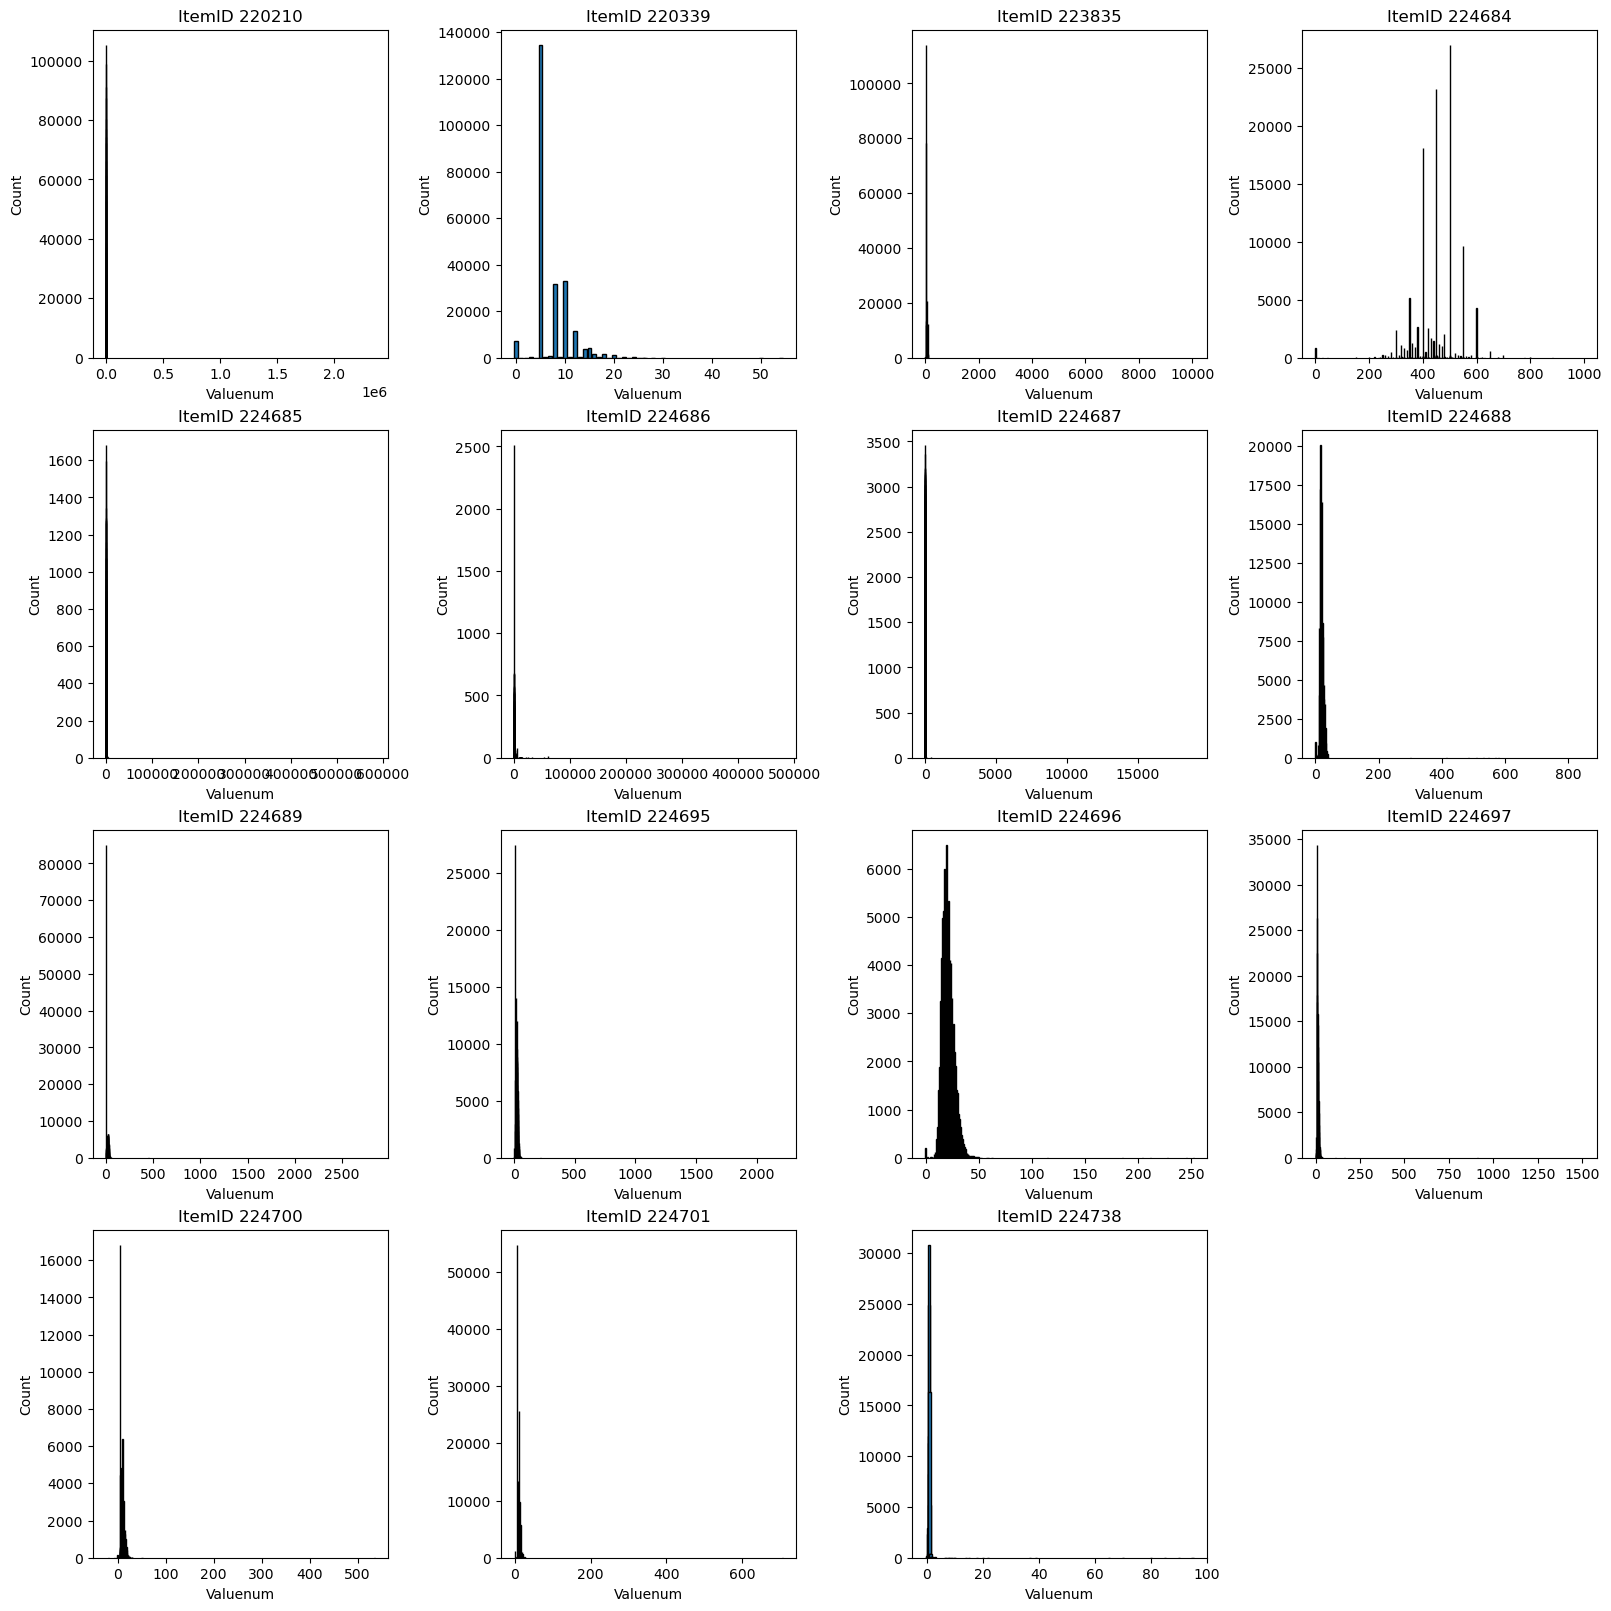

In [51]:
# ItemIDs to plot
itemids = [
    220210, 220339, 223835, 224684, 224685, 224686, 224687, 224688,
    224689, 224695, 224696, 224697, 224700, 224701, 224738
]

# Filter once
filtered = ventilation2.query("itemid in @itemids and valuenum == valuenum")  # dropna more efficiently

# Group once
grouped = filtered.groupby('itemid')['valuenum']

# Keep only non-empty groups
data_dict = {itemid: group for itemid, group in grouped if not group.empty}

# Plot config
n = len(data_dict)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Plot each itemid using pre-counted values for speed
for ax, (itemid, data) in zip(axes, data_dict.items()):
    counts = data.value_counts().sort_index()
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'ItemID {itemid}')
    ax.set_xlabel('Valuenum')
    ax.set_ylabel('Count')

# Hide unused axes
for ax in axes[n:]:
    ax.set_visible(False)

plt.show()

In [52]:
ventilation2.shape

(4272124, 7)

In [53]:
ventilation3 = ventilation2.copy()

In [54]:
# Define valid ranges for specific itemids
valid_ranges = {
    220210: (0, 50),
    220339: (0, 30),
    223835: (21, 100),
    225684: (0, 1000),
    224685: (0, 1000),
    224686: (0, 1000),
    224687: (0, 15),
    224688: (0, 50),
    224689: (0, 50),
    224695: (0, 50),
    224696: (0, 50),
    224697: (0, 50),
    224700: (0, 30),
    224701: (0, 50),
    224738: (0, 5)
}

# Remove all negative valuenums (for all itemids)
ventilation3 = ventilation2.copy()
ventilation3 = ventilation3[ventilation3['valuenum'] >= 0]

# Split DataFrame into two parts:
# - Rows with itemids that need range filtering
# - Rows with itemids we want to keep unchanged
to_filter = ventilation3[ventilation3['itemid'].isin(valid_ranges.keys())].copy()
to_keep = ventilation3[~ventilation3['itemid'].isin(valid_ranges.keys())].copy()

# Apply physiological range filtering to the filtered subset
def in_valid_range(row):
    low, high = valid_ranges[row['itemid']]
    return low <= row['valuenum'] <= high

to_filter = to_filter[to_filter.apply(in_valid_range, axis=1)]

# Combine filtered and unfiltered rows back into a single DataFrame
ventilation3 = pd.concat([to_filter, to_keep], ignore_index=True)

In [55]:
ventilation3.shape

(4257581, 7)

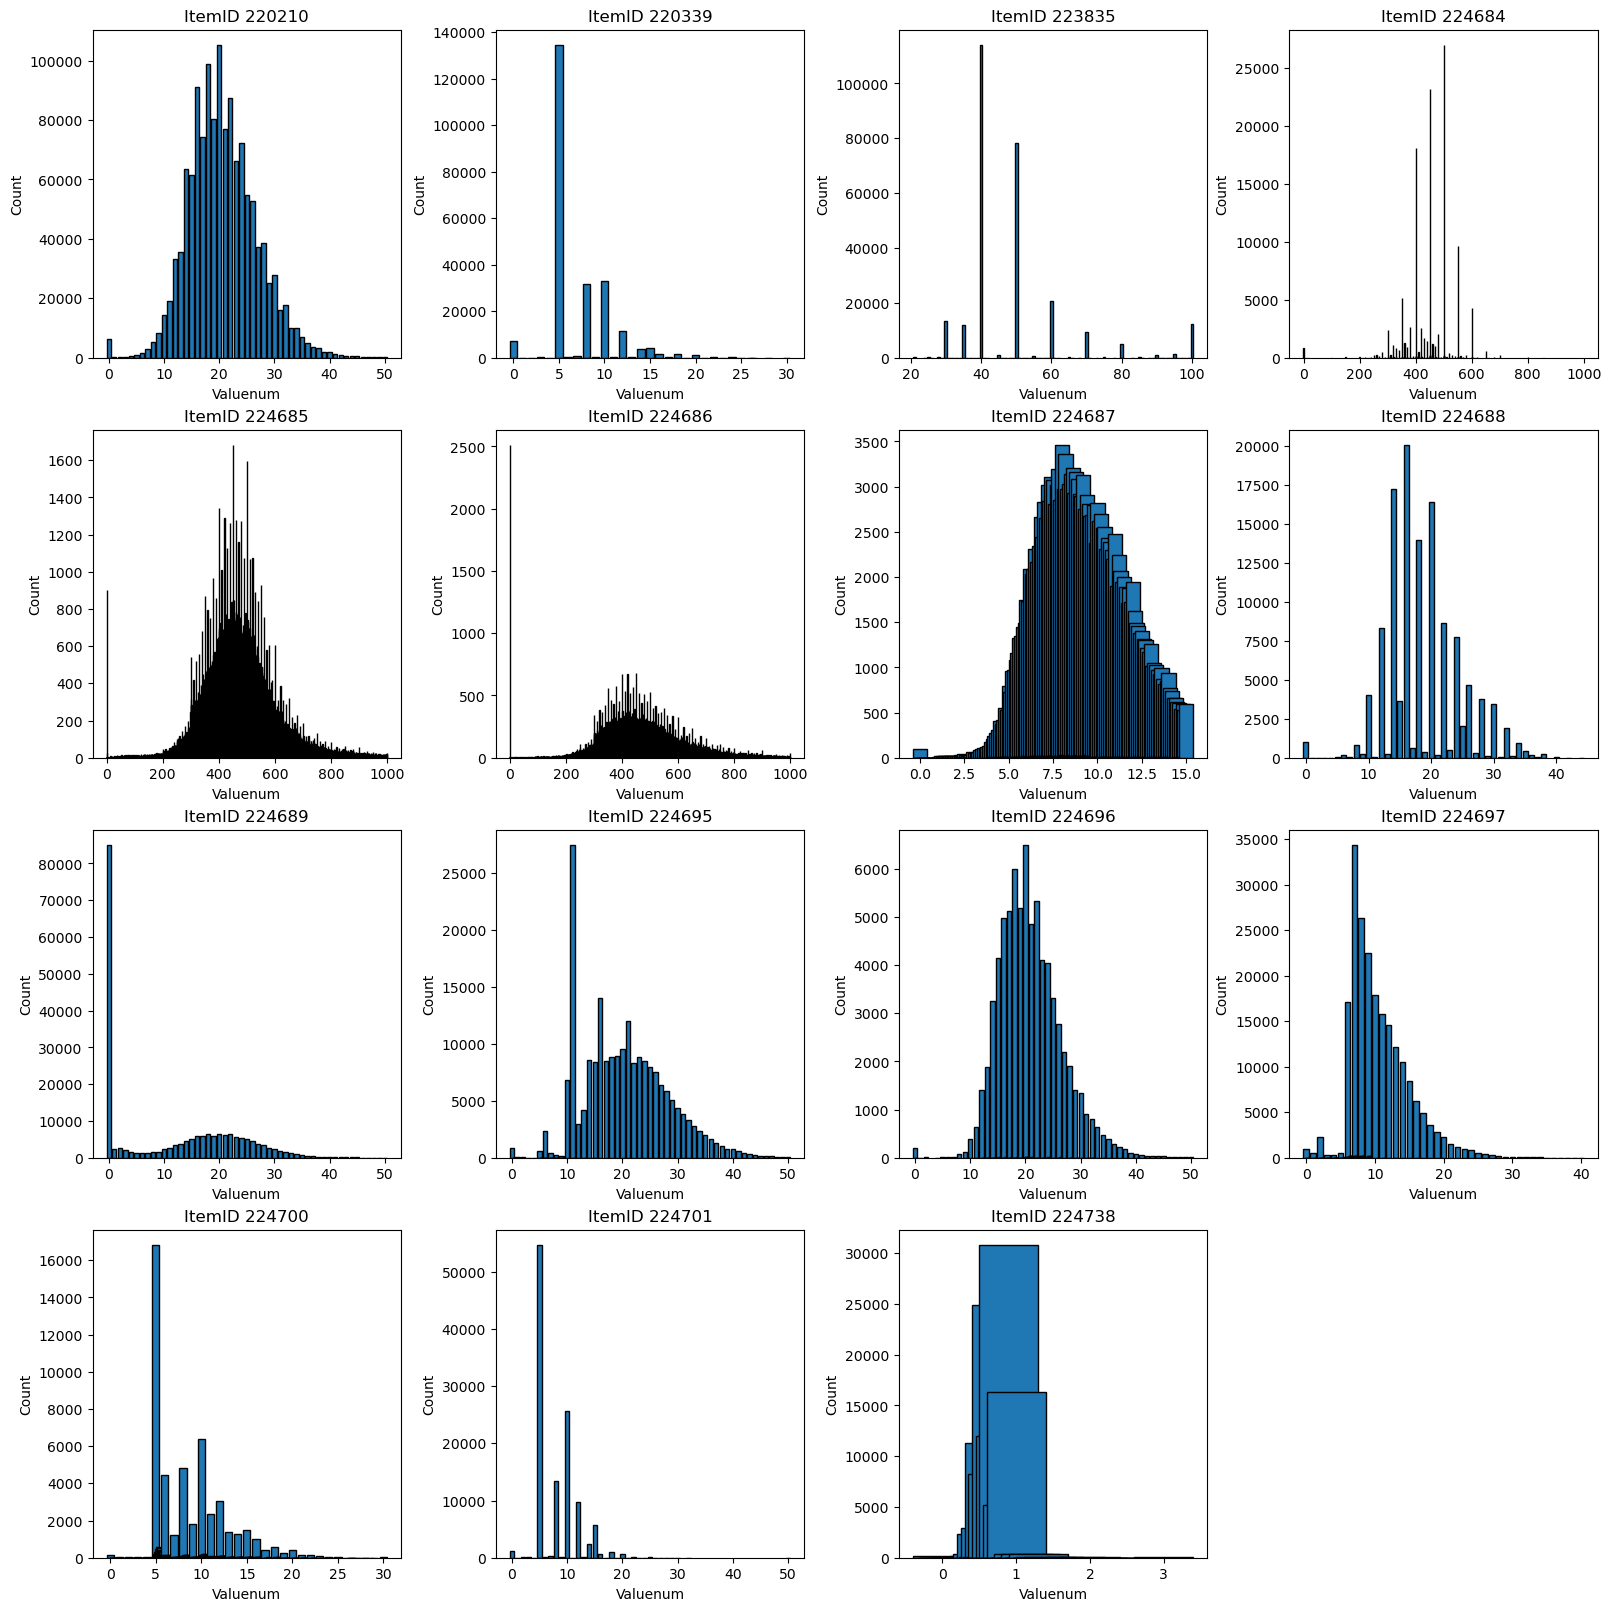

In [56]:
# ItemIDs to plot
itemids = [
    220210, 220339, 223835, 224684, 224685, 224686, 224687, 224688,
    224689, 224695, 224696, 224697, 224700, 224701, 224738
]

# Filter once
filtered = ventilation3.query("itemid in @itemids and valuenum == valuenum")  # dropna more efficiently

# Group once
grouped = filtered.groupby('itemid')['valuenum']

# Keep only non-empty groups
data_dict = {itemid: group for itemid, group in grouped if not group.empty}

# Plot config
n = len(data_dict)
cols = 4
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Plot each itemid using pre-counted values for speed
for ax, (itemid, data) in zip(axes, data_dict.items()):
    counts = data.value_counts().sort_index()
    ax.bar(counts.index, counts.values, edgecolor='black')
    ax.set_title(f'ItemID {itemid}')
    ax.set_xlabel('Valuenum')
    ax.set_ylabel('Count')

# Hide unused axes
for ax in axes[n:]:
    ax.set_visible(False)

plt.show()

In [57]:
# Check for outliers in the dataframe

summary_stats = ventilation3.groupby('itemid')['valuenum'].agg(
    min_value='min',
    max_value='max',
    median_value='median'
).reset_index()

# Load the d_items CSV
d_items_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/mimic-iv-3.1/icu/d_items.csv'
d_items = pd.read_csv(d_items_path)

# Merge the label column with null_counts using itemid
summary_stats = summary_stats.merge(
    d_items[['itemid', 'label']],  
    on='itemid',
    how='left' 
)

print(summary_stats)

    itemid  min_value  max_value  median_value                           label
0   220210        0.0       50.0         20.00                Respiratory Rate
1   220339        0.0       30.0          5.00                        PEEP set
2   223835       21.0      100.0         40.00            Inspired O2 Fraction
3   223849        0.0        1.0          0.00                 Ventilator Mode
4   224369        0.0        1.0          1.00              Sputum Consistency
5   224370        0.0        1.0          0.00                    Sputum Color
6   224373        0.0        1.0          0.00                   Sputum Amount
7   224684        0.0     1000.0        450.00              Tidal Volume (set)
8   224685        0.0     1000.0        465.00         Tidal Volume (observed)
9   224686        0.0     1000.0        456.00      Tidal Volume (spontaneous)
10  224687        0.0       15.0          9.00                   Minute Volume
11  224688        0.0       44.0         18.00      

In [58]:
ventilation4 = ventilation3.copy()

In [59]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/postwean.csv'

# Load the CSV into a DataFrame
outcomes = pd.read_csv(file_path)

outcomes = outcomes[['subject_id', 'stay_id', 'ventilation_time', 'ext_success']]
outcomes = outcomes.drop_duplicates()
ventilation4 = pd.merge(
    ventilation4,
    outcomes[['subject_id', 'stay_id', 'ext_success']],
    on=['subject_id', 'stay_id'],
    how='inner'  # 
)

In [60]:
ventilation4.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,ext_success
0,10002428,38875437,2156-04-22 07:00:00,220339,10,10.0,PEEP set,1
1,10002428,38875437,2156-04-22 07:00:00,223835,40,40.0,Inspired O2 Fraction,1
2,10002428,38875437,2156-04-22 07:00:00,224685,437,437.0,Tidal Volume (observed),1
3,10002428,38875437,2156-04-22 07:00:00,224687,9,9.0,Minute Volume,1
4,10002428,38875437,2156-04-22 07:00:00,224688,22,22.0,Respiratory Rate (Set),1


In [61]:
# Group by subject_id, stay_id, and itemid, count number of samples
group_counts = (
    ventilation4
    .groupby(['subject_id', 'stay_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in ventilation4.columns:
    itemid_label_map = ventilation4[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

In [62]:
avg_samples

,itemid,label,avg_samples_per_subject_stay
0,220210,Respiratory Rate,267.918253
1,220339,PEEP set,47.073249
2,223835,Inspired O2 Fraction,55.430320
3,223849,Ventilator Mode,43.122026
4,224369,Sputum Consistency,29.038642
5,224370,Sputum Color,29.826238
6,224373,Sputum Amount,32.303989
7,224684,Tidal Volume (set),23.916422
8,224685,Tidal Volume (observed),42.950714
9,224686,Tidal Volume (spontaneous),23.811484


In [63]:
file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/postwean.csv'

# Load the CSV into a DataFrame
outcomes = pd.read_csv(file_path)
outcomes = outcomes[['subject_id', 'stay_id', 'ventilation_time', 'ext_success']]
outcomes = outcomes.drop_duplicates()

average_ventilation_time = outcomes['ventilation_time'].mean()

# Print the result
print(f"Average ventilation time (across all subject_id + stay_id): {average_ventilation_time:.2f}")

Average ventilation time (across all subject_id + stay_id): 6671.91


In [64]:
ventilation5 = ventilation4.copy()

In [65]:
# As feature windows need to be the same length, I will isolate the last 24h of each subject_id and stay_id combination

from datetime import timedelta

file_path = '/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/postwean.csv'

# Load the CSV into a DataFrame
outcomes = pd.read_csv(file_path)

# Ensure datetime formats
for col in ['ventilation_endtime', 'extubation_time', 'deathtime']:
    outcomes[col] = pd.to_datetime(outcomes[col])
ventilation5['charttime'] = pd.to_datetime(ventilation5['charttime'])

In [66]:
# 24h time window
# Create an empty list to hold the filtered results
ventilation6_parts = []

# tqdm for progress tracking
from tqdm import tqdm

# Group outcomes by subject_id and stay_id
grouped_outcomes = outcomes.groupby(['subject_id', 'stay_id'])

# Loop through each unique patient-stay combination
for (subject_id, stay_id), group in tqdm(grouped_outcomes, total=len(grouped_outcomes)):

    # Get the latest of the 3 possible times
    reference_time = pd.to_datetime(
        group[['ventilation_endtime', 'extubation_time', 'deathtime']].max(axis=1).iloc[0]
    )
    
    if pd.isnull(reference_time):
        continue  # skip if no valid time

    # Filter ventilation5 for the same subject/stay in the 24h window
    mask = (
        (ventilation5['subject_id'] == subject_id) &
        (ventilation5['stay_id'] == stay_id) &
        (ventilation5['charttime'] >= reference_time - timedelta(hours=24)) &
        (ventilation5['charttime'] <= reference_time)
    )
    filtered = ventilation5[mask]

    if not filtered.empty:
        ventilation6_parts.append(filtered)

# Combine all filtered chunks
ventilation6_24 = pd.concat(ventilation6_parts, ignore_index=True)

100%|███████████████████████████████████████| 5884/5884 [02:32<00:00, 38.64it/s]


In [66]:
# 12h time window

ventilation6_parts = []

# tqdm for progress tracking
from tqdm import tqdm

# Group outcomes by subject_id and stay_id
grouped_outcomes = outcomes.groupby(['subject_id', 'stay_id'])

# Loop through each unique patient-stay combination
for (subject_id, stay_id), group in tqdm(grouped_outcomes, total=len(grouped_outcomes)):

    # Get the latest of the 3 possible times
    reference_time = pd.to_datetime(
        group[['ventilation_endtime', 'extubation_time', 'deathtime']].max(axis=1).iloc[0]
    )
    
    if pd.isnull(reference_time):
        continue  # skip if no valid time

    # Filter ventilation5 for the same subject/stay in the 24h window
    mask = (
        (ventilation5['subject_id'] == subject_id) &
        (ventilation5['stay_id'] == stay_id) &
        (ventilation5['charttime'] >= reference_time - timedelta(hours=12)) &
        (ventilation5['charttime'] <= reference_time)
    )
    filtered = ventilation5[mask]

    if not filtered.empty:
        ventilation6_parts.append(filtered)

# Combine all filtered chunks
ventilation6 = pd.concat(ventilation6_parts, ignore_index=True)

100%|███████████████████████████████████████| 5884/5884 [02:22<00:00, 41.19it/s]


In [67]:
ventilation6_24.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,ext_success
0,10002428,38875437,2156-04-22 07:00:00,220339,10,10.0,PEEP set,1
1,10002428,38875437,2156-04-22 07:00:00,223835,40,40.0,Inspired O2 Fraction,1
2,10002428,38875437,2156-04-22 07:00:00,224685,437,437.0,Tidal Volume (observed),1
3,10002428,38875437,2156-04-22 07:00:00,224687,9,9.0,Minute Volume,1
4,10002428,38875437,2156-04-22 07:00:00,224688,22,22.0,Respiratory Rate (Set),1


In [73]:
ids_24h = set(zip(ventilation6_24['subject_id'], ventilation6_24['stay_id']))
ids_12h = set(zip(ventilation6['subject_id'], ventilation6['stay_id']))

only_in_24h = ids_24h - ids_12h
print(f"Patients with data in 24h but not 12h: {len(only_in_24h)}")

Patients with data in 24h but not 12h: 60


In [68]:
import os

ventilation6_24.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/ventilation_cleaned_combi.csv", index=False)

In [139]:
time_stats = (
    ventilation6.groupby(['subject_id', 'stay_id'])['charttime']
    .agg(
        start_time='min',
        end_time='max',
        time_range=lambda x: x.max() - x.min(),
        duration_hours=lambda x: (x.max() - x.min()).total_seconds() / 3600
    )
    .reset_index()
)

# Preview
print(time_stats.head())

   subject_id   stay_id          start_time            end_time  \
0    10002428  38875437 2156-04-21 18:00:00 2156-04-22 17:10:00   
1    10004235  34100191 2196-02-26 17:00:00 2196-02-27 16:00:00   
2    10004401  39699336 2144-06-17 22:00:00 2144-06-18 21:00:00   
3    10004733  39635619 2174-12-06 17:00:00 2174-12-07 16:15:00   
4    10005817  31316840 2135-01-18 19:00:00 2135-01-19 18:00:00   

       time_range  duration_hours  
0 0 days 23:10:00       23.166667  
1 0 days 23:00:00       23.000000  
2 0 days 23:00:00       23.000000  
3 0 days 23:15:00       23.250000  
4 0 days 23:00:00       23.000000  


In [141]:
# Group by subject_id and stay_id and calculate time stats
time_stats = (
    ventilation6
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(start_time='min', end_time='max')
    .reset_index()
)

# Calculate time range and duration in hours
time_stats['time_range'] = time_stats['end_time'] - time_stats['start_time']
time_stats['duration_hours'] = time_stats['time_range'].dt.total_seconds() / 3600

# Now calculate the average duration across all patient-stay groups
average_duration = time_stats['duration_hours'].mean()
min_duration = time_stats['duration_hours'].min()
max_duration = time_stats['duration_hours'].max()

# Print results
print(f"📊 Average duration: {average_duration:.2f} hours")
print(f"🔻 Shortest duration: {min_duration:.2f} hours")
print(f"🔺 Longest duration: {max_duration:.2f} hours")

📊 Average duration: 22.58 hours
🔻 Shortest duration: 0.00 hours
🔺 Longest duration: 24.00 hours


In [142]:
ventilation6.shape

(606925, 8)

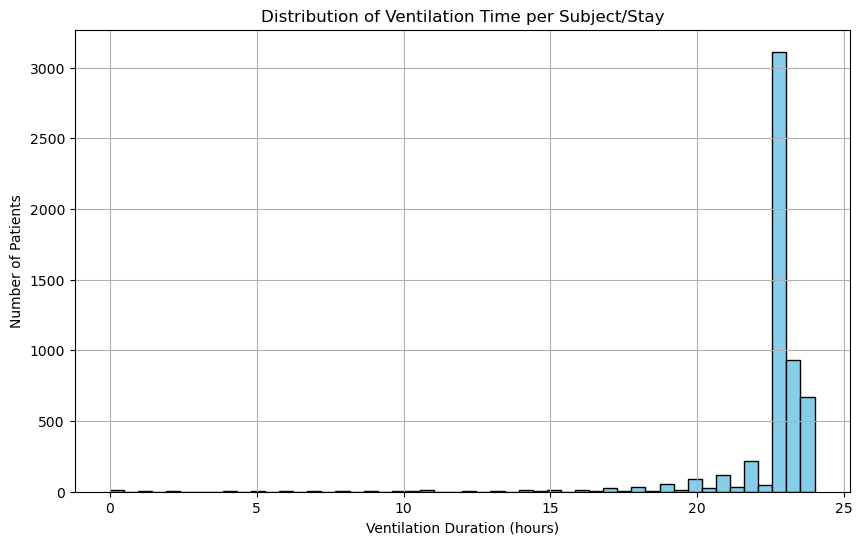

In [143]:
# Group by subject_id and stay_id and compute duration
duration_df = (
    ventilation6
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (duration_df['max'] - duration_df['min']).dt.total_seconds() / 3600

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(duration_df['duration_hours'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Ventilation Duration (hours)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Ventilation Time per Subject/Stay')
plt.grid(True)
plt.show()

In [144]:
# Remove patients with < 20h data

duration_df = (
    ventilation6
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(start_time='min', end_time='max')
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (
    (duration_df['end_time'] - duration_df['start_time']).dt.total_seconds() / 3600
)

# Filter to keep only combinations with at least 20 hours
valid_stays = duration_df[duration_df['duration_hours'] >= 20][['subject_id', 'stay_id']]

# Filter ventilation6 using only valid subject_id & stay_id
ventilation6_filtered = ventilation6.merge(valid_stays, on=['subject_id', 'stay_id'], how='inner')

# Reset index
ventilation6 = ventilation6_filtered.reset_index(drop=True)
ventilation6.shape

(591493, 8)

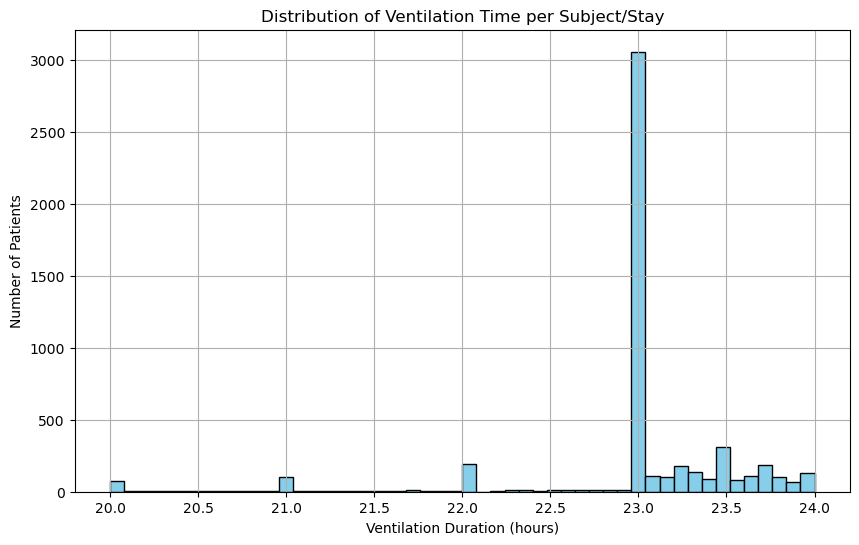

In [145]:
# Group by subject_id and stay_id and compute duration
duration_df = (
    ventilation6
    .groupby(['subject_id', 'stay_id'])['charttime']
    .agg(['min', 'max'])
    .reset_index()
)

# Calculate duration in hours
duration_df['duration_hours'] = (duration_df['max'] - duration_df['min']).dt.total_seconds() / 3600

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(duration_df['duration_hours'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Ventilation Duration (hours)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Ventilation Time per Subject/Stay')
plt.grid(True)
plt.show()

In [146]:
# Group by subject_id, stay_id, and itemid, count number of samples
group_counts = (
    ventilation6
    .groupby(['subject_id', 'stay_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in ventilation6.columns:
    itemid_label_map = ventilation6[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

avg_samples

,itemid,label,avg_samples_per_subject_stay
0,220210,Respiratory Rate,28.762297
1,220339,PEEP set,7.507365
2,223835,Inspired O2 Fraction,7.628230
3,223849,Ventilator Mode,7.475859
4,224369,Sputum Consistency,4.288516
5,224370,Sputum Color,4.390628
6,224373,Sputum Amount,4.605654
7,224684,Tidal Volume (set),4.258983
8,224685,Tidal Volume (observed),6.615693
9,224686,Tidal Volume (spontaneous),5.359647


In [147]:
ventilation7 = ventilation6.copy()

# Remove itemid 224684
ventilation7 = ventilation7[ventilation7['itemid'] != 224684]

# Map itemids to merged values
itemid_mapping = {
    224370: 224369,
    224373: 224369,
    220339: 224700
}

# Apply mapping
ventilation7['itemid'] = ventilation7['itemid'].replace(itemid_mapping)

In [148]:
ventilation7.shape

(579521, 8)

In [149]:
# Group by subject_id, stay_id, and itemid, count number of samples
group_counts = (
    ventilation7
    .groupby(['subject_id', 'stay_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in ventilation7.columns:
    itemid_label_map = ventilation7[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

avg_samples

,itemid,label,avg_samples_per_subject_stay
0,220210,Respiratory Rate,28.762297
1,223835,Inspired O2 Fraction,7.628230
2,223849,Ventilator Mode,7.475859
3,224369,Sputum Amount,12.982621
4,224369,Sputum Consistency,12.982621
5,224369,Sputum Color,12.982621
6,224685,Tidal Volume (observed),6.615693
7,224686,Tidal Volume (spontaneous),5.359647
8,224687,Minute Volume,6.725160
9,224688,Respiratory Rate (Set),4.354232


In [150]:
labels_to_remove = ["Sputum Consistency", "Sputum Color", "Total PEEP Level"]
ventilation7 = ventilation7[~ventilation7['label'].isin(labels_to_remove)]

In [151]:
ventilation7.shape

(533704, 8)

In [152]:
# Group by subject_id, stay_id, and itemid, count number of samples
group_counts = (
    ventilation7
    .groupby(['subject_id', 'stay_id', 'itemid'])
    .size()
    .reset_index(name='sample_count')
)

# Compute average sample count per itemid
avg_samples = (
    group_counts
    .groupby('itemid')['sample_count']
    .mean()
    .reset_index(name='avg_samples_per_subject_stay')
)

# If 'label' exists and is associated uniquely with itemid, merge it in
if 'label' in ventilation7.columns:
    itemid_label_map = ventilation7[['itemid', 'label']].drop_duplicates()
    avg_samples = avg_samples.merge(itemid_label_map, on='itemid', how='left')

# Reorder columns if needed
avg_samples = avg_samples[['itemid', 'label', 'avg_samples_per_subject_stay']] if 'label' in avg_samples.columns else avg_samples

avg_samples

,itemid,label,avg_samples_per_subject_stay
0,220210,Respiratory Rate,28.762297
1,223835,Inspired O2 Fraction,7.628230
2,223849,Ventilator Mode,7.475859
3,224369,Sputum Amount,4.605654
4,224685,Tidal Volume (observed),6.615693
5,224686,Tidal Volume (spontaneous),5.359647
6,224687,Minute Volume,6.725160
7,224688,Respiratory Rate (Set),4.354232
8,224689,Respiratory Rate (spontaneous),6.688656
9,224695,Peak Insp. Pressure,6.470435


In [153]:
# On the basis of the samples here, aim for a sampling frequency of at least once every 4 hours, which is 7 measurements in 24h

from sklearn.model_selection import train_test_split

target_frequency = 7

In [154]:
def calculate_synthetic_data_proportion(df, patient_id_col, feature_col, target_frequency=13):
    synthetic_data_proportion = {}
    for patient_id in df[patient_id_col].unique():
        patient_data = df[df[patient_id_col] == patient_id]
        total_entries = len(patient_data)
        synthetic_entries = 0
        for feature in df[feature_col].unique():
            feature_data = patient_data[patient_data[feature_col] == feature]
            observed_count = len(feature_data)
            if observed_count < target_frequency:
                synthetic_entries += (target_frequency - observed_count)
        synthetic_data_proportion[patient_id] = synthetic_entries / total_entries
    return synthetic_data_proportion

In [155]:
# Calculate the synthetic data proportion that will be required for each feature
synthetic_data_proportion = calculate_synthetic_data_proportion(ventilation7, 'subject_id', 'label', target_frequency)
synthetic_data_proportion_df = pd.DataFrame(list(synthetic_data_proportion.items()), columns=['subject_id', 'synthetic_data_proportion'])
synthetic_data_proportion_df

,subject_id,synthetic_data_proportion
0,10002428,0.203390
1,10004235,0.842857
2,10004401,1.114754
3,10004733,0.861111
4,10005817,0.529412
...,...,...
5197,19990821,0.387097
5198,19991446,0.303922
5199,19997293,0.583333
5200,19997367,0.147059


In [156]:
def calculate_patient_synthetic_data_proportion(patient_data, target_frequency=13):
    patient_synthetic_data_proportion = {}
    for patient_id, group in patient_data.groupby('subject_id'):
        observed_count = group['label'].count()
        total_expected = len(group) * target_frequency
        synthetic_count = total_expected - observed_count
        synthetic_proportion = synthetic_count / total_expected
        patient_synthetic_data_proportion[patient_id] = synthetic_proportion
    return patient_synthetic_data_proportion   

In [157]:
def create_synthetic_data_proportion_df(patient_data):
    synthetic_data_proportion = calculate_patient_synthetic_data_proportion(patient_data)
    synthetic_df = pd.DataFrame(list(synthetic_data_proportion.items()), columns=['subject_id', 'synthetic_proportion'])
    return synthetic_df

In [158]:
def stratified_split(patient_data, test_size=0.2, random_state=42):
    synthetic_df = create_synthetic_data_proportion_df(patient_data)
    train_ids, test_ids = train_test_split(
        synthetic_df['subject_id'],
        test_size=test_size,
        random_state=random_state,
        stratify=synthetic_df['synthetic_proportion']
    )
    train_data = patient_data[patient_data['subject_id'].isin(train_ids)]
    test_data = patient_data[patient_data['subject_id'].isin(test_ids)]
    return train_data, test_data

In [159]:
# Split into train and test data
train_data, test_data = stratified_split(ventilation7, test_size=0.2, random_state=42)

print(f"Total number of patients in train set: {len(train_data['subject_id'].unique())}")
print(f"Total number of patients in test set: {len(test_data['subject_id'].unique())}")

Total number of patients in train set: 4161
Total number of patients in test set: 1041


In [160]:
def compare_synthetic_data_proportions(train_df, test_df, patient_id_col, feature_col, target_frequency=13):
    train_synthetic_data_proportion = calculate_synthetic_data_proportion(train_df, patient_id_col, feature_col, target_frequency)
    test_synthetic_data_proportion = calculate_synthetic_data_proportion(test_df, patient_id_col, feature_col, target_frequency)

    train_avg_synthetic_data_proportion = sum(train_synthetic_data_proportion.values()) / len(train_synthetic_data_proportion)
    test_avg_synthetic_data_proportion = sum(test_synthetic_data_proportion.values()) / len(test_synthetic_data_proportion)

    print(f"Train Average Synthetic Data Proportion: {train_avg_synthetic_data_proportion:.4f}")
    print(f"Test Average Synthetic Data Proportion: {test_avg_synthetic_data_proportion:.4f}")

def compare_class_distributions(train_df, test_df, target_col):
    train_class_distribution = train_df[target_col].value_counts(normalize=True)
    test_class_distribution = test_df[target_col].value_counts(normalize=True)

    print("Train Class Distribution:")
    print(train_class_distribution)
    print("\nTest Class Distribution:")
    print(test_class_distribution)

def compare_feature_distributions(train_df, test_df, feature_cols):
    train_feature_stats = train_df[feature_cols].describe().transpose()
    test_feature_stats = test_df[feature_cols].describe().transpose()

    comparison_df = train_feature_stats[['mean', 'std']].merge(
        test_feature_stats[['mean', 'std']],
        left_index=True,
        right_index=True,
        suffixes=('_train', '_test')
    )

    print("\nFeature Statistics Comparison:")
    print(comparison_df)

In [161]:
# Synthetic data requirement between test and train datasets

compare_synthetic_data_proportions(train_data, test_data, 'subject_id', 'label', target_frequency)

Train Average Synthetic Data Proportion: 0.5660
Test Average Synthetic Data Proportion: 0.5435


In [162]:
def compare_class_distributions(train_df, test_df, target_col):
    train_class_distribution = train_df[target_col].value_counts(normalize=True)
    test_class_distribution = test_df[target_col].value_counts(normalize=True)

    print("Train Class Distribution:")
    print(train_class_distribution)
    print("\nTest Class Distribution:")
    print(test_class_distribution)

In [163]:
# Outcome proportions between test and train datasets

compare_class_distributions(train_data, test_data, 'ext_success')

Train Class Distribution:
ext_success
1    0.783709
0    0.216291
Name: proportion, dtype: float64

Test Class Distribution:
ext_success
1    0.767443
0    0.232557
Name: proportion, dtype: float64


In [192]:
def compare_feature_stats(train_df, test_df, feature_labels):
    results = []

    for label in feature_labels:
        train_vals = train_df[train_df['label'] == label]['valuenum'].dropna()
        test_vals = test_df[test_df['label'] == label]['valuenum'].dropna()

        if len(train_vals) == 0 or len(test_vals) == 0:
            continue  # skip if no data in one of the splits

        results.append({
            'feature': label,
            'mean_train': train_vals.mean(),
            'std_train': train_vals.std(),
            'mean_test': test_vals.mean(),
            'std_test': test_vals.std()
        })

    comparison_df = pd.DataFrame(results)
    print("\nFeature Statistics Comparison:")
    print(comparison_df)

    return comparison_df

In [193]:
# feature_labels = ventilation7['label'].tolist()

# compare_feature_stats(train_data, test_data, feature_labels)

In [164]:
# Normalise each value using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

# Create an empty list to hold the normalized data
normalized_frames = []

# Loop through each itemid and normalize valuenum within its group
for itemid, group in train_data.groupby('itemid'):
    scaler = MinMaxScaler()
    group = group.copy()  # avoid SettingWithCopyWarning
    group['valuenum_normalized'] = scaler.fit_transform(group[['valuenum']])
    normalized_frames.append(group)

# Concatenate all normalized groups back together
train_data = pd.concat(normalized_frames, ignore_index=True)

In [165]:
train_data.head()

,subject_id,stay_id,charttime,itemid,value,valuenum,label,ext_success,valuenum_normalized
0,10002428,38875437,2156-04-21 19:00:00,220210,22,22.0,Respiratory Rate,1,0.44
1,10002428,38875437,2156-04-21 20:00:00,220210,22,22.0,Respiratory Rate,1,0.44
2,10002428,38875437,2156-04-21 21:00:00,220210,24,24.0,Respiratory Rate,1,0.48
3,10002428,38875437,2156-04-21 22:00:00,220210,24,24.0,Respiratory Rate,1,0.48
4,10002428,38875437,2156-04-21 23:00:00,220210,24,24.0,Respiratory Rate,1,0.48


In [166]:
train_data = train_data[['subject_id', 'stay_id', 'charttime', 'itemid', 'label', 'valuenum_normalized', 'ext_success']]

train_data.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10002428,38875437,2156-04-21 19:00:00,220210,Respiratory Rate,0.44,1
1,10002428,38875437,2156-04-21 20:00:00,220210,Respiratory Rate,0.44,1
2,10002428,38875437,2156-04-21 21:00:00,220210,Respiratory Rate,0.48,1
3,10002428,38875437,2156-04-21 22:00:00,220210,Respiratory Rate,0.48,1
4,10002428,38875437,2156-04-21 23:00:00,220210,Respiratory Rate,0.48,1


In [167]:
train_data = train_data.sort_values(by=['subject_id', 'charttime']).reset_index(drop=True)

train_data.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10002428,38875437,2156-04-21 18:00:00,220210,Respiratory Rate,0.440000,1
1,10002428,38875437,2156-04-21 19:00:00,220210,Respiratory Rate,0.440000,1
2,10002428,38875437,2156-04-21 20:00:00,220210,Respiratory Rate,0.440000,1
3,10002428,38875437,2156-04-21 20:00:00,223835,Inspired O2 Fraction,0.240506,1
4,10002428,38875437,2156-04-21 20:00:00,223849,Ventilator Mode,0.000000,1


In [168]:
# Normalise each value using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

# Create an empty list to hold the normalized data
normalized_frames = []

# Loop through each itemid and normalize valuenum within its group
for itemid, group in test_data.groupby('itemid'):
    scaler = MinMaxScaler()
    group = group.copy()  # avoid SettingWithCopyWarning
    group['valuenum_normalized'] = scaler.fit_transform(group[['valuenum']])
    normalized_frames.append(group)

# Concatenate all normalized groups back together
test_data = pd.concat(normalized_frames, ignore_index=True)

In [169]:
test_data = test_data[['subject_id', 'stay_id', 'charttime', 'itemid', 'label', 'valuenum_normalized', 'ext_success']]
test_data = test_data.sort_values(by=['subject_id', 'charttime']).reset_index(drop=True)

In [170]:
test_data.head()

,subject_id,stay_id,charttime,itemid,label,valuenum_normalized,ext_success
0,10004733,39635619,2174-12-06 17:00:00,220210,Respiratory Rate,0.200000,1
1,10004733,39635619,2174-12-06 18:00:00,220210,Respiratory Rate,0.240000,1
2,10004733,39635619,2174-12-06 19:00:00,220210,Respiratory Rate,0.280000,1
3,10004733,39635619,2174-12-06 20:00:00,220210,Respiratory Rate,0.160000,1
4,10004733,39635619,2174-12-06 20:00:00,223835,Inspired O2 Fraction,0.177215,1


In [171]:
import os

train_data.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/ventilation_cleaned_train.csv", index=False)
test_data.to_csv("/Users/mmurali1/Documents/Imperial/MIMICIV_analysis/ventilation_cleaned_test.csv", index=False)